In [1]:
from PIL import Image
import jsonlines
from pathlib import Path
import os
from dotenv import load_dotenv
import cv2

load_dotenv()

TEAM_NAME = os.getenv("TEAM_NAME", "7up")
TEAM_TRACK = os.getenv("TEAM_TRACK", "advanced")


input_dir = Path(f"/home/jupyter/{TEAM_TRACK}")
# input_dir = Path(f"../../data/{TEAM_TRACK}/train")
results_dir = Path(f"/home/jupyter/{TEAM_NAME}")
# results_dir = Path("results")
results_dir.mkdir(parents=True, exist_ok=True)
data = {'image': [], 'annotations': []}
count = 0

with jsonlines.open(input_dir / "vlm.jsonl") as reader:
    for obj in reader:
        if count < 100:  # Check if we have processed less than 10 entries
            data['image'].append(obj['image'])
            data['annotations'].append(obj['annotations'])
            count += 1
        else:
            break

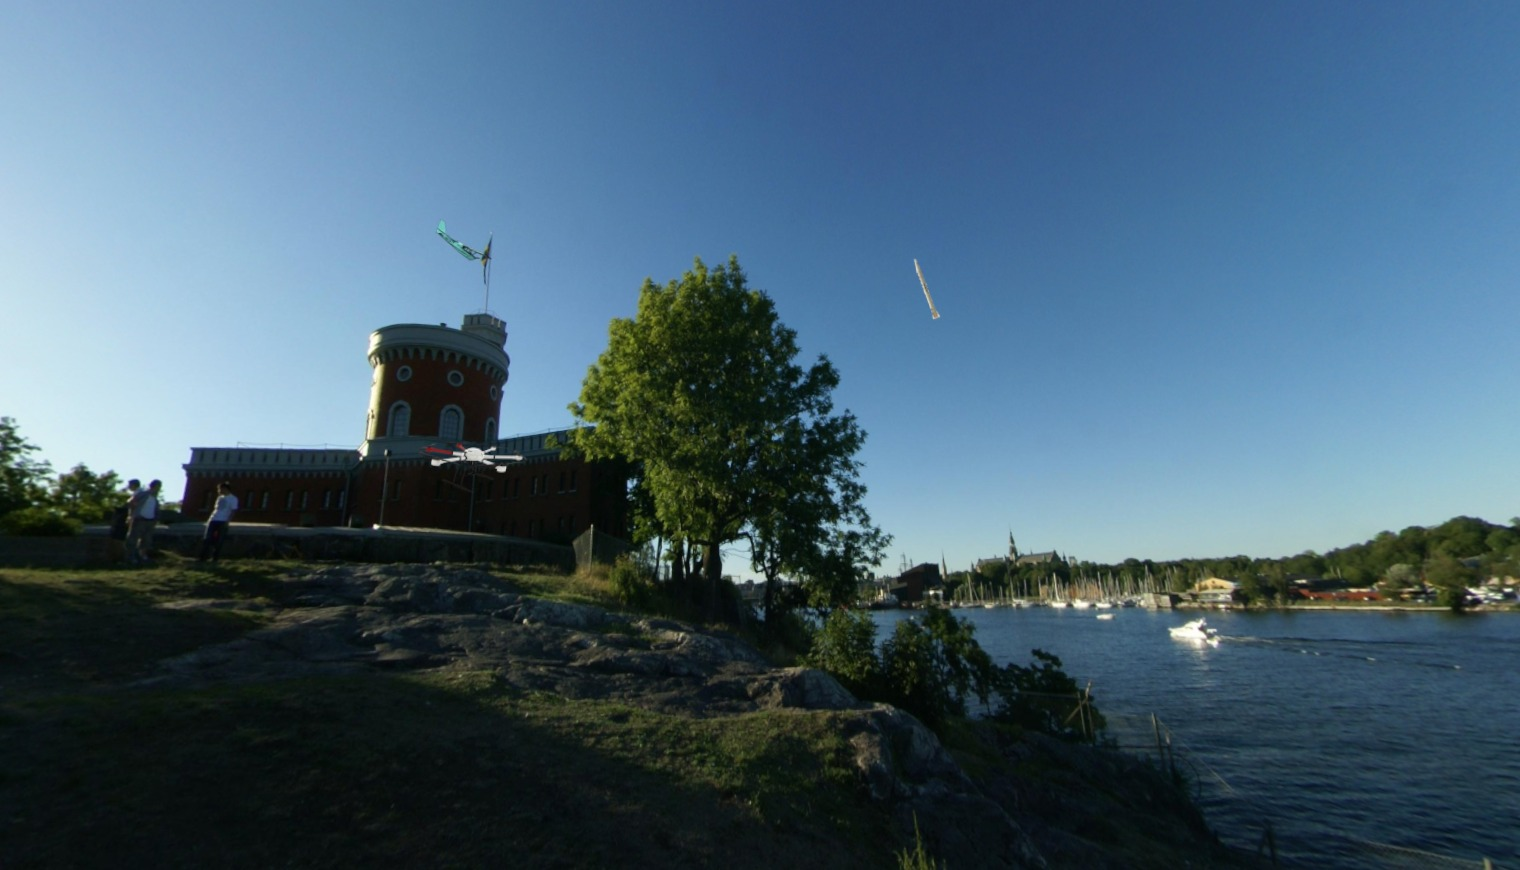

In [2]:
    # Change this index to get image number you want
    idx = 90
    
    image_path = data['image'][idx]
    # Load an image
    image_path = input_dir / "images" / image_path  # Change this to your image path
    image = cv2.imread(str(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Convert to PIL image
    image_pil = Image.fromarray(image)

image_pil

In [3]:
data['annotations'][idx]

[{'caption': 'green light aircraft', 'bbox': [436, 220, 56, 40]},
 {'caption': 'white, black, and red drone', 'bbox': [412, 440, 124, 52]},
 {'caption': 'white missile', 'bbox': [912, 260, 28, 60]}]

In [4]:
from VLMManager import VLMManager
from io import BytesIO
from PIL import Image,  UnidentifiedImageError
import requests

def test_vlm_manager():
    # Convert the PIL Image object to bytes
    image_bytes = BytesIO()
    image_pil.save(image_bytes, format='PNG')
    image_data = image_bytes.getvalue()

    # Set the caption for the image
    caption = "green light aircraft"

    # Create an instance of the VLMManager
    manager = VLMManager()

    try:
        # Call the identify method and print the result
        bbox = manager.identify(image_data, caption)
        print(f"Bounding box coordinates: {bbox}")
    except UnidentifiedImageError:
        print("Error: Could not process the provided image data.")

# Run the test
test_vlm_manager()

Bounding box coordinates: [440, 220, 40, 40]
